# Data Set Description

1. Predicted attribute: class of iris plant.
2. This is an exceedingly simple domain.
3. Number of Instances: 150 (50 in each of three classes)

4. Number of Attributes: 4 numeric, predictive attributes and the class

5. Attribute Information:
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: 
      -- Iris Setosa
      -- Iris Versicolour
      -- Iris Virginica

6. Missing Attribute Values: None

7. Summary Statistics:
	         Min  Max   Mean    SD   Class Correlation
  - sepal length: 4.3  7.9   5.84  0.83    0.7826   
  - sepal width: 2.0  4.4   3.05  0.43   -0.4194
  - petal length: 1.0  6.9   3.76  1.76    0.9490  (high!)
  - petal width: 0.1  2.5   1.20  0.76    0.9565  (high!)

8. Class Distribution: 33.3% for each of 3 classes.





In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
iris = pd.read_csv("iris.csv") #load the dataset

In [7]:
iris.head(2) #show the first 2 rows from the dataset

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa


In [9]:
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris.info()  #checking if there is any inconsistency in the dataset
#as we see there are no null values in the dataset, so the data can be processed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


## Some Exploratory Data Analysis With Iris

In [17]:
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


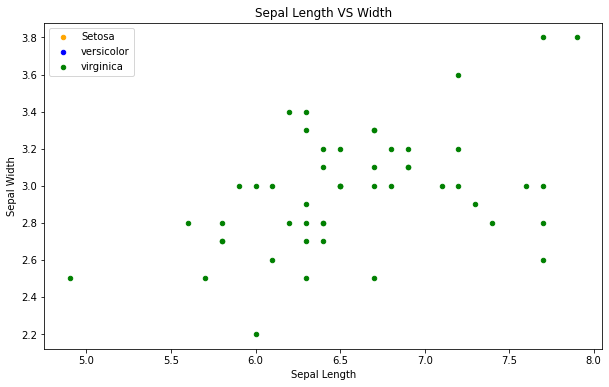

In [22]:
fig = iris[iris.variety=='setosa'].plot(kind='scatter',x='sepal.length',y='sepal.width',color='orange', label='Setosa')
iris[iris.variety=='versicolor'].plot(kind='scatter',x='sepal.length',y='sepal.width',color='blue', label='versicolor',ax=fig)
iris[iris.variety=='Virginica'].plot(kind='scatter',x='sepal.length',y='sepal.width',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

The above graph shows relationship between the sepal length and width. Now we will check relationship between the petal length and width.

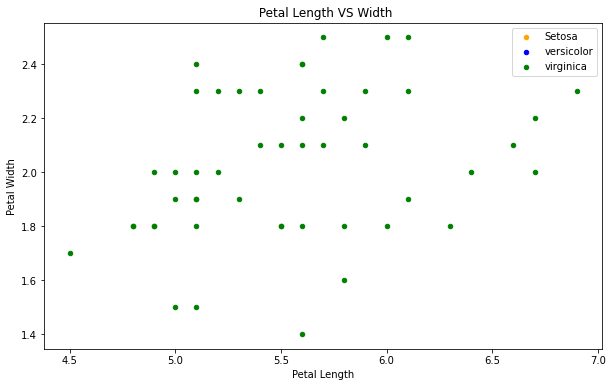

In [23]:
fig = iris[iris.variety=='setosa'].plot(kind='scatter',x='petal.length',y='petal.width',color='orange', label='Setosa')
iris[iris.variety=='versicolor'].plot(kind='scatter',x='petal.length',y='petal.width',color='blue', label='versicolor',ax=fig)
iris[iris.variety=='Virginica'].plot(kind='scatter',x='petal.length',y='petal.width',color='green', label='virginica', ax=fig)
fig.set_xlabel("petal Length")
fig.set_ylabel("petal Width")
fig.set_title(" petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

As we can see that the petal Features are giving a better cluster division compared to the Sepal features. This is an indication that the petals can help in better and accurate Predictions over the Sepal. We will check that later.

### Now let us see how are the length and width are distributed

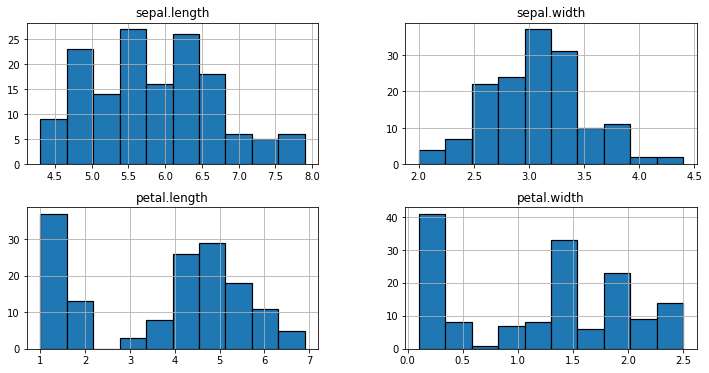

In [24]:
iris.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

### Now let us see how the length and width vary according to the variety

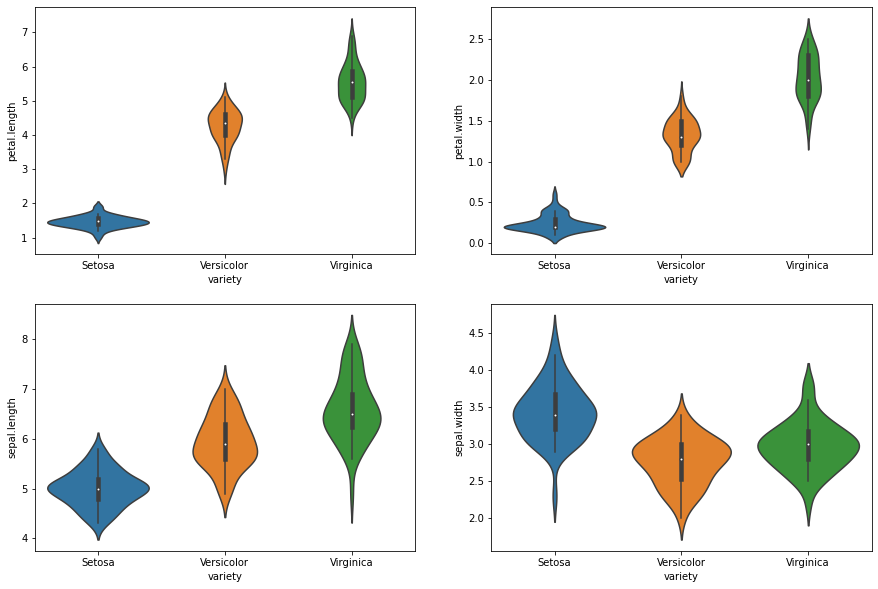

In [27]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='variety',y='petal.length',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='variety',y='etal.width',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='variety',y='sepal.length',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='variety',y='sepal.width',data=iris)

The violinplot shows density of the length and width in the variety. The thinner part denotes that there is less density whereas the fatter part conveys higher density

### Now the given problem is a classification problem.. Thus we will be using the classification algorithms to build a model.
**Classification**: samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data

**Regression**: if the desired output consists of one or more continuous variables, then the task is called regression. An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight.

Before we start, we need to clear some ML notations.

**attributes**-->An attribute is a property of an instance that may be used to determine its classification. In the following dataset, the attributes are the petal and sepal length and width. It is also known as **Features**.

**Target variable**, in the machine learning context is the variable that is or should be the output. Here the target variables are the 3 flower variety.

In [29]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm

In [30]:
iris.shape #get the shape of the dataset

(150, 5)

Now, when we train any algorithm, the number of features and their correlation plays an important role. If there are features and many of the features are highly correlated, then training an algorithm with all the featues will reduce the accuracy. Thus features selection should be done carefully. This dataset has less featues but still we will see the correlation.

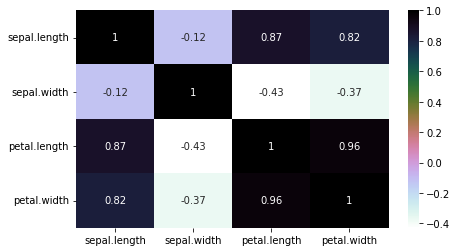

In [31]:
plt.figure(figsize=(7,4)) 
sns.heatmap(iris.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

**Observation--->**

The Sepal Width and Length are not correlated
The petal Width and Length are highly correlated

We will use all the features for training the algorithm and check the accuracy.

Then we will use 1 petal Feature and 1 Sepal Feature to check the accuracy of the algorithm as we are using only 2 features that are not correlated. Thus we can have a variance in the dataset which may help in better accuracy. We will check it later.

### Steps To Be followed When Applying an Algorithm

 1. Split the dataset into training and testing dataset. The testing dataset is generally smaller than training one as it will help in training the model better.
 2. Select any algorithm based on the problem (classification or regression) whatever you feel may be good.
 3. Then pass the training dataset to the algorithm to train it. We use the **.fit()** method
 4. Then pass the testing data to the trained algorithm to predict the outcome. We use the **.predict()** method.
 5. We then check the accuracy by **passing the predicted outcome and the actual output** to the model.

### Splitting The Data into Training And Testing Dataset

In [32]:
train, test = train_test_split(iris, test_size = 0.3)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [38]:
train_X = train[['sepal.length','sepal.width','petal.length','petal.width']]# taking the training data features
train_y=train.variety# output of our training data
test_X= test[['sepal.length','sepal.width','petal.length','petal.width']] # taking test data features
test_y =test.variety   #output value of test data

Lets check the Train and Test Dataset

In [39]:
train_X.head(2)

,sepal.length,sepal.width,petal.length,petal.width
73,6.1,2.8,4.7,1.2
126,6.2,2.8,4.8,1.8


In [40]:
test_X.head(2)

,sepal.length,sepal.width,petal.length,petal.width
33,5.5,4.2,1.4,0.2
120,6.9,3.2,5.7,2.3


In [41]:
train_y.head()  ##output of the training data

73     Versicolor
126     Virginica
60     Versicolor
50     Versicolor
88     Versicolor
Name: variety, dtype: object

### Support Vector Machine (SVM)

In [42]:
model = svm.SVC() #select the algorithm
model.fit(train_X,train_y) # we train the algorithm with the training data and the training output
prediction=model.predict(test_X) #now we pass the testing data to the trained algorithm
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,test_y))#now we check the accuracy of the algorithm. 
#we pass the predicted output by the model and the actual output

The accuracy of the SVM is: 0.9555555555555556


SVM is giving very good accuracy . We will continue to check the accuracy for different models.

Now we will follow the same steps as above for training various machine learning algorithms.

### Logistic Regression

In [43]:
model = LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Logistic Regression is 0.9777777777777777


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### Decision Tree

In [44]:
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Decision Tree is 0.9111111111111111


### K-Nearest Neighbours

In [45]:
model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))

The accuracy of the KNN is 0.9555555555555556


### Let's check the accuracy for various values of n for K-Nearest nerighbours

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


([<matplotlib.axis.XTick at 0x7fcc9f86a390>,
 <a list of 10 Text major ticklabel objects>)

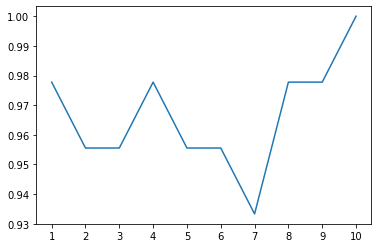

In [46]:
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_y)))
plt.plot(a_index, a)
plt.xticks(x)

Above is the graph showing the accuracy for the KNN models using different values of n. 

### We used all the features of iris in above models. Now we will use petals and Sepals Seperately

### Creating petals And Sepals Training Data 

In [49]:
petal=iris[['petal.length','petal.width','variety']]
sepal=iris[['sepal.length','sepal.width','variety']]

In [52]:
train_p,test_p=train_test_split(petal,test_size=0.3,random_state=0)  #petals
train_x_p=train_p[['petal.width','petal.length']]
train_y_p=train_p.variety
test_x_p=test_p[['petal.width','petal.length']]
test_y_p=test_p.variety


train_s,test_s=train_test_split(sepal,test_size=0.3,random_state=0)  #Sepal
train_x_s=train_s[['sepal.width','sepal.length']]
train_y_s=train_s.variety
test_x_s=test_s[['sepal.width','sepal.length']]
test_y_s=test_s.variety

### SVM

In [53]:
model=svm.SVC()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the SVM using petals is:',metrics.accuracy_score(prediction,test_y_p))

model=svm.SVC()
model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the SVM using Sepal is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the SVM using petals is: 0.9777777777777777
The accuracy of the SVM using Sepal is: 0.8


### Logistic Regression

In [54]:
model = LogisticRegression()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Logistic Regression using petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Logistic Regression using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Logistic Regression using petals is: 0.9777777777777777
The accuracy of the Logistic Regression using Sepals is: 0.8222222222222222


### Decision Tree

In [55]:
model=DecisionTreeClassifier()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Decision Tree using petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Decision Tree using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Decision Tree using petals is: 0.9555555555555556
The accuracy of the Decision Tree using Sepals is: 0.6666666666666666


### K-Nearest Neighbours

In [56]:
model=KNeighborsClassifier(n_neighbors=3) 
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the KNN using petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the KNN using petals is: 0.9777777777777777
The accuracy of the KNN using Sepals is: 0.7333333333333333


### Observations:

 - Using petals over Sepal for training the data gives a much better accuracy.
 - This was expected as we saw in the heatmap above that the correlation between the Sepal Width and Length was very low whereas the correlation between petal Width and Length was very high. 

# **Thank You!!** 